In [1]:
import pandas as pd
from tokenizers import SimpleTokenizer
from sentiment_analyzer import SimpleSentimentAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./resources/sample_data/reddit-comments-2015-08.csv')

In [10]:
df.head()

,body,tokens,sent_score
0,I joined a new league this year and they have ...,"[joined, a, new, league, year, different, scor...",-0.032787
1,"In your scenario, a person could just not run ...","[scenario, a, person, just, not, run, mandator...",0.012658
2,They don't get paid for how much time you spen...,"[dont, get, paid, much, time, spend, building,...",-0.074074
3,"I dunno, back before the August update in an A...","[dunno, back, august, update, a, lobby, tower,...",0.051724
4,"No, but Toriyama sometimes would draw himself ...","[no, toriyama, sometimes, draw, a, little, rob...",-0.047619


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
body          15000 non-null object
tokens        15000 non-null object
sent_score    15000 non-null float64
dtypes: float64(1), object(2)
memory usage: 351.6+ KB


In [9]:
tokenizer = SimpleTokenizer()
sa = SimpleSentimentAnalyzer()

score_sentiment = lambda x: sa.score(x)
tokenize = lambda x: tokenizer.tokenize(x)

In [5]:
df['tokens'] = df['body'].apply(tokenize)

In [6]:
df.head()

,body,tokens
0,I joined a new league this year and they have ...,"[joined, a, new, league, year, different, scor..."
1,"In your scenario, a person could just not run ...","[scenario, a, person, just, not, run, mandator..."
2,They don't get paid for how much time you spen...,"[dont, get, paid, much, time, spend, building,..."
3,"I dunno, back before the August update in an A...","[dunno, back, august, update, a, lobby, tower,..."
4,"No, but Toriyama sometimes would draw himself ...","[no, toriyama, sometimes, draw, a, little, rob..."


In [8]:
df['sent_score'] = df['tokens'].apply(lambda x: sa.score(x))

In [12]:
df['sent_score'].sum()

43.57692183478441

In [13]:
df['sent_score'].mean()

0.0029051281223189604

In [14]:
df['sent_score'].median()

0.0

In [15]:
df.head()

,body,tokens,sent_score
0,I joined a new league this year and they have ...,"[joined, a, new, league, year, different, scor...",-0.032787
1,"In your scenario, a person could just not run ...","[scenario, a, person, just, not, run, mandator...",0.012658
2,They don't get paid for how much time you spen...,"[dont, get, paid, much, time, spend, building,...",-0.074074
3,"I dunno, back before the August update in an A...","[dunno, back, august, update, a, lobby, tower,...",0.051724
4,"No, but Toriyama sometimes would draw himself ...","[no, toriyama, sometimes, draw, a, little, rob...",-0.047619


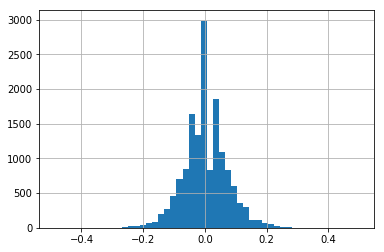

In [16]:
df['sent_score'].hist(bins=50)

In [ ]:
def get_wordlist(path):
    with open(path) as f:
        words = []
        for line in f:
            words.append(line.strip())
        return words

In [93]:
pos_words = get_wordlist('./resources/positive_words')
neg_words = get_wordlist('./resources/negative_words')
stop_words = get_wordlist('./resources/stopwords')
negation_words = get_wordlist('./resources/negation_words')

In [90]:
print('Positive Word Length: {}'.format(len(set(pos_words))))
print('Negative Word Length: {}'.format(len(set(neg_words))))
print('Stop Word Length: {}'.format(len(set(stop_words))))

Positive Word Length: 2032
Negative Word Length: 4770
Stop Word Length: 172


In [94]:
pos_and_neg = set(pos_words) & set(neg_words)
stop_and_neg = set(stop_words) & set(neg_words)
pos_and_stop = set(pos_words) & set(stop_words)
negation_and_stop = set(negation_words) & set(stop_words)

In [95]:
negation_and_stop

{'nor', 'not'}

In [34]:
def write_list_to_file(words, path):
    with open(path, 'w') as f:
        for word in words:
            f.write(word + "\n")

In [39]:
write_list_to_file(new_pos_words, './resources/new_pos_words')